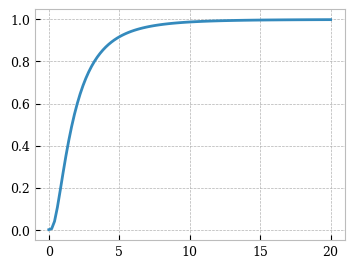

In [168]:
import sys
import os
from itertools import permutations, combinations


CURRENT_DIR = os.path.dirname(os.path.realpath("__file__"))
BASE_DIR = os.path.join(CURRENT_DIR, os.pardir)
OUTPUT_DIR = os.path.join(BASE_DIR, "output")
FIG_DIR = os.path.join(OUTPUT_DIR, "figures")

sys.path.append(BASE_DIR)
sys.path.append(CURRENT_DIR)

import matplotlib.pyplot as plt
from model.functions import *
from model.utils import *
plt.style.use('../model/myBmh.mplstyle')

xx = np.linspace(0, 20, 100)
yy = [lognormal_cdf (x, 0.5, 0.8) for x in xx]

plt.plot(xx, yy)

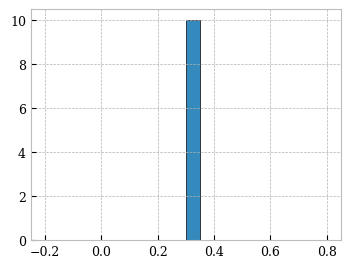

In [169]:
n = 10
N = np.arange(n)
pmean = 0.3
psigma = 0.01
pp = np.random.normal(0.3, 0.1, n)
pp = pp * 0 + pmean


plt.figure()
plt.hist(pp, bins=20, edgecolor='k')
plt.show()

[LOG]: Saved figure to /home/simon/Documents/Study/Delft/AE-MSc1/ABM/project/abm-flood-adaptation/analysis/../output/figures/binomial-example.pdf


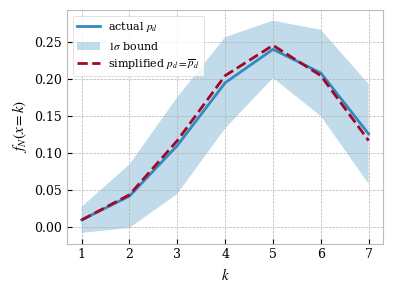

In [175]:
from scipy.stats import binom
from math import comb

n = 10
N = np.arange(n)
kk = range(1, n - 2)

pmean = 0.5
psigma = 0.2
# pp = pp * 0 + pmean

n_simulations = 100
all_results = np.zeros((n_simulations, len(kk)))

for idx_s in range(n_simulations):
    pp = np.random.normal(pmean, psigma, n)
    results = []
    for k in kk:
        prob_k = 0
        for A in combinations(N, k):
            prob = 1
            for i in N:
                pi = pp[i]
                prob *= pi if i in A else (1 - pi)
            prob_k += prob
        results.append(prob_k)

    all_results[idx_s, :] = results
    
res_mean = np.mean(all_results, axis=0)
res_std = np.std(all_results, axis=0)

expected = binom.pmf(kk, n, pmean)



plt.figure()
plt.plot(kk, res_mean, label=r"actual $p_d$")
plt.fill_between(kk, res_mean - res_std, res_mean + res_std, alpha=0.3, label=r"$1\sigma$ bound")
plt.plot(kk, expected, '--', label=r"simplified $p_d=\overline{p}_d$")
plt.legend()
plt.xlabel(r"$k$")
plt.ylabel(r"$f_N(x=k)$")
savefig("binomial-example.pdf", FIG_DIR)
plt.show()
